In [71]:
import sympy as sym
import numpy as np
import scipy as sp
from scipy import linalg,spatial,signal

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Maybe solar panels structures

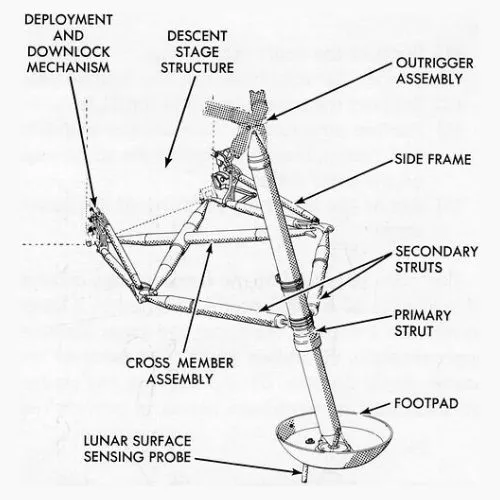

https://apollo11space.com/nasas-apollo-11-lunar-module-basic-facts/

(6, 2)
(5, 2)


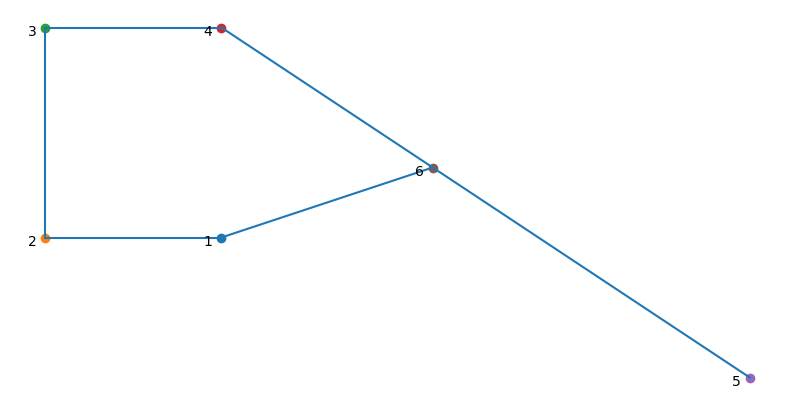

In [72]:
fig, ax = plt.subplots(figsize = (10, 5))
L1 = 2 # m - dolžina
L2 = 2 # m - višina
k1 = 0.25
k2 = 0.4
vozlisca_osn_A = np.array([[k1 * L1, k2 * L2], [0, k2*L2], [0,L2], [k1 * L1, L2], [L1, 0]])

# Dolocitev vmesnega vozlisca
k3 = 0.6
y_P = k3*L2
x_P = (k3*(k1-1) +1)*L1
vozlisca_osn_A = np.append(vozlisca_osn_A, [x_P, y_P])
elementi_osn_A = np.array([[0,1],[1,2], [2, 3], [3, 4], [0,5]])
vozlisca_osn_A = vozlisca_osn_A.reshape(6, 2)


for i in vozlisca_osn_A:
    ax.plot(i[0], i[1], 'o')

for element in elementi_osn_A:
    x = [vozlisca_osn_A[element[0], 0], vozlisca_osn_A[element[1], 0]]
    y = [vozlisca_osn_A[element[0], 1], vozlisca_osn_A[element[1], 1]]
    ax.plot(x, y, 'C0')
[plt.text(*c,n+1) for n,c in enumerate(vozlisca_osn_A-0.05)];
plt.axis('off');
print(vozlisca_osn_A.shape)   # Output: (3, 2)
print(elementi_osn_A.shape)

In [73]:
# osnovna geometrija
vozlisca_osn_A = np.array([[0,0],[0,10],[5,10]])
elementi_osn_A = np.array([[0,1],[1,2]])
elementi_osn_A[0]

array([0, 1])

In [74]:
def zgosti_mrezo(vozlisca_osn, elementi_osn, approx_elem_size):

    vozlisca = np.copy(vozlisca_osn)
    elementi = np.empty((0,2), int)

    for element in elementi_osn:
        dist = sp.spatial.distance.euclidean(vozlisca_osn[element[0]],vozlisca_osn[element[1]])
        n = np.round(dist/approx_elem_size).astype(int)

        x_coor = np.linspace(vozlisca[element[0],0], vozlisca_osn[element[1],0],n)[1:-1]
        y_coor = np.linspace(vozlisca[element[0],1], vozlisca_osn[element[1],1],n)[1:-1]
        voz = np.block([[x_coor],[y_coor]]).T

        novi_ind_vozlisc = len(vozlisca) + np.arange(len(voz))
        vozlisca = np.append(vozlisca, voz, axis = 0)
        sez_voz = np.block([element[0],novi_ind_vozlisc,element[1]])
        elem = np.array([[sez_voz[_],sez_voz[_+1]] for _ in range(len(sez_voz)-1)])
        elementi = np.append(elementi, elem, axis = 0)
        
    return(vozlisca, elementi)

def zgostitev(vozlisca_osn, elementi_osn, number_of_elements = [2]):
    
    # V primeru, ko so vsi 
    if len(number_of_elements) == 1:
        
        vozlisca = np.copy(vozlisca_osn)
        elementi = np.empty((0,2), int)
        
        for i in elementi_osn: 
            x = np.linspace(vozlisca[i[0],0], vozlisca_osn[i[1],0], number_of_elements[0] + 1)[1:-1]
            y = np.linspace(vozlisca[i[0],1], vozlisca_osn[i[1],1], number_of_elements[0] + 1)[1:-1]
            voz = np.column_stack((x, y))
            
            novi_ind_vozlisc = len(vozlisca) + np.arange(len(voz))
            vozlisca = np.append(vozlisca, voz, axis = 0)
            sez_voz = np.block([i[0],novi_ind_vozlisc,i[1]])
            elem = np.array([[sez_voz[_],sez_voz[_+1]] for _ in range(len(sez_voz)-1)])
            elementi = np.append(elementi, elem, axis = 0)
        return (vozlisca, elementi)
    
    elif len(number_of_elements) == len(elementi_osn):
        vozlisca = np.copy(vozlisca_osn)
        elementi = np.empty((0,2), int)
        
        for j in np.arange(len(elementi_osn)):
            x = np.linspace(vozlisca[elementi_osn[j][0],0], vozlisca_osn[elementi_osn[j][1],0], 1 + int(number_of_elements[j]))[1:-1]
            y = np.linspace(vozlisca[elementi_osn[j][0],1], vozlisca_osn[elementi_osn[j][1],1], 1 + int(number_of_elements[j]))[1:-1]
            voz = np.column_stack((x, y))
        
            novi_ind_vozlisc = len(vozlisca) + np.arange(len(voz))
            vozlisca = np.append(vozlisca, voz, axis = 0)
            sez_voz = np.block([elementi_osn[j][0], novi_ind_vozlisc, elementi_osn[j][1]])
            elem = np.array([[sez_voz[_],sez_voz[_+1]] for _ in range(len(sez_voz)-1)])
            elementi = np.append(elementi, elem, axis = 0)
        return (vozlisca, elementi)
    # return(vozlisca, elementi)
    
    else:
        print("Error!")
        print("To many numbers of elements - Array to long")

Zgoraj treba popravit, da bo zgostilo vsako stvar za sebe

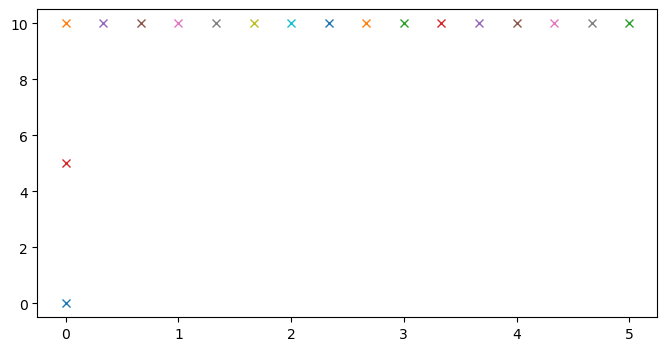

In [75]:
vozlisca_A, elementi_A = zgostitev(vozlisca_osn_A, elementi_osn_A, [2, 15])
# print(vozlisca_A)
fig, ax = plt.subplots(figsize=(8,4))
for i in np.arange(len(vozlisca_A)):
    ax.plot(vozlisca_A[i][0], vozlisca_A[i][1], 'x')

In [76]:
print(vozlisca_A)
print(elementi_A)

[[ 0.          0.        ]
 [ 0.         10.        ]
 [ 5.         10.        ]
 [ 0.          5.        ]
 [ 0.33333333 10.        ]
 [ 0.66666667 10.        ]
 [ 1.         10.        ]
 [ 1.33333333 10.        ]
 [ 1.66666667 10.        ]
 [ 2.         10.        ]
 [ 2.33333333 10.        ]
 [ 2.66666667 10.        ]
 [ 3.         10.        ]
 [ 3.33333333 10.        ]
 [ 3.66666667 10.        ]
 [ 4.         10.        ]
 [ 4.33333333 10.        ]
 [ 4.66666667 10.        ]]
[[ 0  3]
 [ 3  1]
 [ 1  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 11]
 [11 12]
 [12 13]
 [13 14]
 [14 15]
 [15 16]
 [16 17]
 [17  2]]


## Struktura 1

(6, 2)
(3, 2)


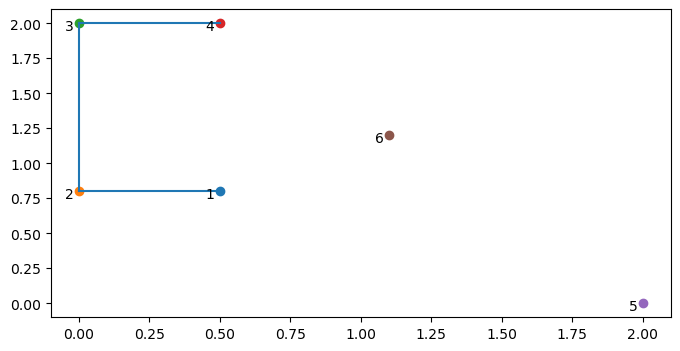

In [77]:
L1 = 2 # m - dolžina
L2 = 2 # m - višina
k1 = 0.25
k2 = 0.4
vozlisca_osn_A = np.array([[k1 * L1, k2 * L2], [0, k2*L2], [0,L2], [k1 * L1, L2], [L1, 0]])

# Dolocitev vmesnega vozlisca
k3 = 0.6
y_P = k3*L2
x_P = (k3*(k1-1) +1)*L1
vozlisca_osn_A = np.append(vozlisca_osn_A, [x_P, y_P])
elementi_osn_A = np.array([[0,1],[1,2], [2, 3]])
vozlisca_osn_A = vozlisca_osn_A.reshape(6, 2)

fig, ax = plt.subplots(figsize=(8, 4))
for i in vozlisca_osn_A:
    ax.plot(i[0], i[1], 'o')

for element in elementi_osn_A:
    x = [vozlisca_osn_A[element[0], 0], vozlisca_osn_A[element[1], 0]]
    y = [vozlisca_osn_A[element[0], 1], vozlisca_osn_A[element[1], 1]]
    ax.plot(x, y, 'C0')
[ax.text(*c,n+1) for n,c in enumerate(vozlisca_osn_A-0.05)];
# plt.axis('off');
print(vozlisca_osn_A.shape)   # Output: (3, 2)
print(elementi_osn_A.shape)

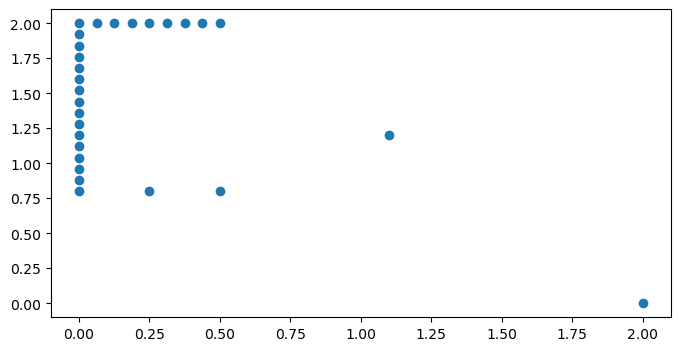

In [89]:
vozlisca_A, elementi_A = zgostitev(vozlisca_osn_A, elementi_osn_A, [2, 15, 8])
# print(vozlisca_A)
fig, ax = plt.subplots(figsize=(8,4))
for i in np.arange(len(vozlisca_A)):
    ax.plot(vozlisca_A[i][0], vozlisca_A[i][1], 'o', color='C0')

In [79]:
# PALIČJE

# masna matrika
def M_p(A, L, ρ):

    M = ρ*A*L/6*np.array([
    [2, 0, 1, 0],
    [0, 2, 0, 1],
    [1, 0, 2, 0],
    [0, 1, 0, 2]])
    
    return M

def K_p(A, E, L, α):

    c = np.cos(α)
    s = np.sin(α)
    
    K = A*E/L*np.array([
    [ c**2,   s*c, -c**2,  -s*c],
    [  s*c,  s**2,  -s*c, -s**2],
    [-c**2,  -s*c,  c**2,   s*c],
    [ -c*s, -s**2,   s*c,  s**2]])
    
    return K

In [80]:
# OKVIR
# transformacijska matrika
def T(α):
    
    T = np.array([[ np.cos(α), np.sin(α), 0,         0,         0, 0],
                   [-np.sin(α), np.cos(α), 0,         0,         0, 0],
                   [         0,         0, 1,         0,         0, 0],
                   [         0,         0, 0, np.cos(α), np.sin(α), 0],
                   [         0,         0, 0,-np.sin(α), np.cos(α), 0],
                   [         0,         0, 0,         0,         0, 1]])
        
    return T

# masna matrika
def M_o(A, L, ρ, α):

    M_lok = ρ*A*L*np.array([[1/3,         0,         0, 1/6,         0,         0],
                            [  0,     13/35,  11*L/210,   0,      9/70, -13*L/420],
                            [  0,  11*L/210,  L**2/105,   0,  13*L/420, -L**2/140],
                            [1/6,         0,         0, 1/3,         0,         0],
                            [  0,      9/70,  13*L/420,   0,     13/35, -11*L/210],
                            [  0, -13*L/420, -L**2/140,   0, -11*L/210,  L**2/105]])
    
    return T(α).T @ M_lok @ T(α)

# togostna matrika
def K_o(A, E, I, L, α):

    K_lok = E/L*np.array([[ A,          0,      0, -A,          0,      0],
                          [ 0,  12*I/L**2,  6*I/L,  0, -12*I/L**2,  6*I/L],
                          [ 0,      6*I/L,    4*I,  0,     -6*I/L,    2*I],
                          [-A,          0,      0,  A,          0,      0],
                          [ 0, -12*I/L**2, -6*I/L,  0,  12*I/L**2, -6*I/L],
                          [ 0,      6*I/L,    2*I,  0,     -6*I/L,    4*I]])
    
    return T(α).T @ K_lok @ T(α)

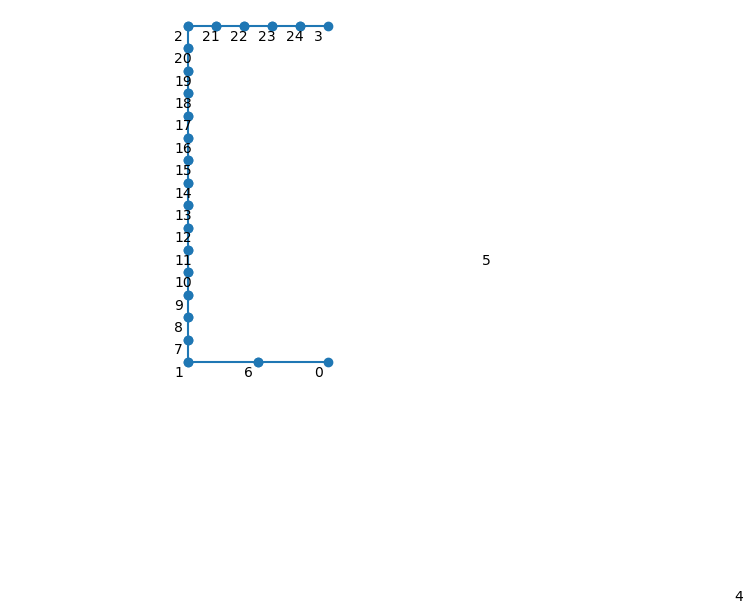

In [81]:
# Podstruktura A - okvir

# podatki
L1 = 0.8 # m
L2 = 1.2 # m
h = 0.030 # m

ρ_A = 2700 # kg /m3
E_A = 70e9 # Pa

A_A = h*h # m^2
I_A = h*h**3/12 # m^4

# # osnovna geometrija
# vozlisca_osn_A = np.array([[0,0],[0,L1],[L2,L1]])
# elementi_osn_A = np.array([[0,1],[1,2]])

# # zgostitev mreže
# approx_elem_size = 0.1 # m
# vozlisca_A, elementi_A = zgostitev(vozlisca_osn_A, elementi_osn_A, [7, 18])

# izris
plt.axis('equal')
[plt.plot(*vozlisca_A[e].T,'-o',c='C0') for e in elementi_A];
[plt.text(*c,n) for n,c in enumerate(vozlisca_A-0.05)];
plt.axis('off');

# zlaganje
n_ps_A = 3*len(vozlisca_A)
M_glob_A = np.zeros((n_ps_A,n_ps_A))
K_glob_A = np.zeros((n_ps_A,n_ps_A))

for element in elementi_A:
    Le = sp.spatial.distance.euclidean(vozlisca_A[element[0]], vozlisca_A[element[1]])
    αe = np.arctan2(np.diff(vozlisca_A[element,1]) , np.diff(vozlisca_A[element,0]))[0]
    ind = (3*element[:,None] + np.array([0, 1, 2])).flatten()
    
    M_glob_A[ind[:,None],ind] += M_o(A_A, Le, ρ_A, αe)
    K_glob_A[ind[:,None],ind] += K_o(A_A, E_A, I_A, Le, αe)
    
# print(vozlisca_osn_A)
# print(vozlisca_A)

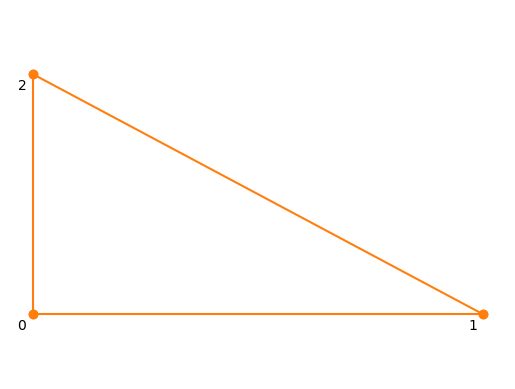

In [82]:
# Podstruktura B - paličje

# podatki
L3 = 0.8 # m
L4 = 1.5 # m
φ = 0*np.pi/4 # rad
d = 0.010 # m

ρ_B = 7800 # kg /m3
E_B = 210e9 # Pa
A_B = np.pi * d**2 / 4 # m^2

# osnovna geometrija
vozlisca_B = np.array([[L2,0],[L2+L4,0],[L2,L3]])
elementi_B = np.array([[0,1],[1,2],[2,0]])

# izris
plt.axis('equal')
[plt.plot(*vozlisca_B[e].T,'-o',c='C1') for e in elementi_B];
[plt.text(*c,n) for n,c in enumerate(vozlisca_B-0.05)];
plt.axis('off');

# zlaganje
n_ps_B = 2*len(vozlisca_B)
M_glob_B = np.zeros((n_ps_B,n_ps_B))
K_glob_B = np.zeros((n_ps_B,n_ps_B))

for element in elementi_B:
    Le = sp.spatial.distance.euclidean(vozlisca_B[element[0]], vozlisca_B[element[1]])
    αe = np.arctan2(np.diff(vozlisca_B[element,1]) , np.diff(vozlisca_B[element,0]))[0]
    ind = (2*element[:,None] + np.array([0, 1])).flatten()
    
    M_glob_B[ind[:,None],ind] += M_p(A_B, Le, ρ_B)
    K_glob_B[ind[:,None],ind] += K_p(A_B, E_B, Le, αe)

In [83]:
# robni pogoji in povezava podstruktur

# A - robni pogoji
ind_vpetih_ps = np.array([0,1,2])
C_A_rp = np.zeros((len(ind_vpetih_ps),n_ps_A))
C_A_rp[np.arange(len(ind_vpetih_ps)),ind_vpetih_ps] = 1

# B - robni pogoji - ročno za boljše razumevanje
C_B_rp = np.array([[0, 0, np.tan(φ), -1, 0, 0]])

C_rp = sp.linalg.block_diag(C_A_rp,C_B_rp)

# AB povezava - ročno za boljše razumevanje
C_A_pov = np.zeros((2,n_ps_A))
C_A_pov[[0,1],[6,7]] = 1

C_B_pov = np.zeros((2,n_ps_B))
C_B_pov[[0,1],[4,5]] = -1

C_pov = np.hstack([C_A_pov,C_B_pov]) 

# združeno
C = np.vstack([C_rp, C_pov])
L_AB = sp.linalg.null_space(C)

# združitev masne in togostne matrike
M_glob_AB = L_AB.T @ sp.linalg.block_diag(M_glob_A, M_glob_B) @ L_AB
K_glob_AB = L_AB.T @ sp.linalg.block_diag(K_glob_A, K_glob_B) @ L_AB

In [84]:
# problem lastnih vrednosti
eig_val, eig_vec = sp.linalg.eig(K_glob_AB, M_glob_AB)

# urejanje po velikosti
_ind = np.argsort(np.abs(eig_val))
eig_val = np.abs(eig_val[_ind])
eig_vec = eig_vec[:,_ind]

eig_freq = np.abs(eig_val)**0.5 / 2 / np.pi

# interpretacija rezultata
eig_vec_A = L_AB[:n_ps_A,:] @ eig_vec
eig_vec_B = L_AB[-n_ps_B:,:] @ eig_vec

In [85]:
# lastne frekvence [Hz]
eig_freq[:6].round(1)

array([ 96.2, 384.8, 545. , 637.2, 638.3, 865.4])

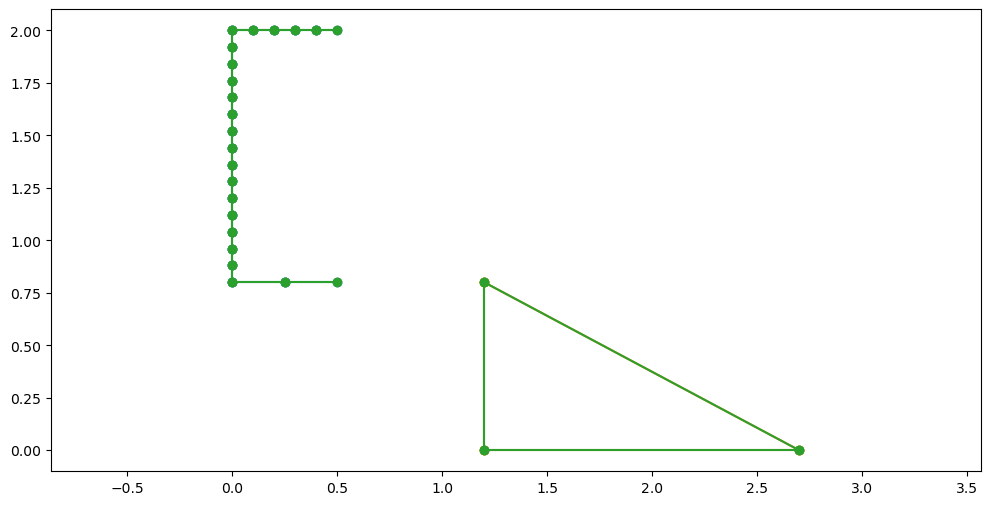

In [86]:
# animacija lastnih oblik
m = 7
s = 1 # scale faktor

# podstruktura A
pomiki_x_A = eig_vec_A[0::3,m].real
pomiki_y_A = eig_vec_A[1::3,m].real

# podstruktura B
pomiki_x_B = eig_vec_B[0::2,m].real
pomiki_y_B = eig_vec_B[1::2,m].real

# stacionarni izris
def_vozlisca_A = np.copy(vozlisca_A)
def_vozlisca_A[:,0] += pomiki_x_A * s
def_vozlisca_A[:,1] += pomiki_y_A * s

def_vozlisca_B = np.copy(vozlisca_B)
def_vozlisca_B[:,0] += pomiki_x_B * s
def_vozlisca_B[:,1] += pomiki_y_B * s

fig, ax = plt.subplots(figsize = (12, 6))

# osnovno stanje
ax.axis('equal')
[ax.plot(*vozlisca_A[e].T,'-o',c='C0') for e in elementi_A];
[ax.plot(*vozlisca_B[e].T,'-o',c='C1') for e in elementi_B];

# deformirano stanje
ax.axis('equal')
[ax.plot(*def_vozlisca_A[e].T,'-o',c='C2') for e in elementi_A];
[ax.plot(*def_vozlisca_B[e].T,'-o',c='C2') for e in elementi_B];